---
<img src="../assets/grt_logo.png" style="float: left; margin: 20px; height: 55px">

# Garton Research & Trading

_May 2019_

---

## Breast Cancer Classification Study

---

**Context:** The purpose of this study is to use classification modeling techniques for breast cancer diagnosis. This is primarily a learning exercise for me in exploring machine learning concepts. For this study I used the [Wisconsin Breast Cancer Classification](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) dataset from the UCI Repository.

This first notebook is primarily for data cleaning and preparation, and some preliminary EDA. The next notebooks will cover full exploratory analysis and modeling.

_Author: Matthew Garton_

In [17]:
# import necessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [18]:
# read in the header names as a Series
header = pd.read_table('../data/field_names.txt', header=None, squeeze=True)

# read in the data as a pandas DataFrame
cancer = pd.read_csv('../data/breast-cancer.csv', header=None, names=header, index_col=0)

In [19]:
# inspect the data - look at the first few rows
cancer.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Evaluation

Some basic steps I'll take to evaluate the data and check for problems:
1. Use the `.info()` method to check for data type and any missing data.
    a. In this case, there doesn't appear to be any missing values to deal with
2. Aside from missing data, I want to check the distribution of values for each numeric column.
    b. Pandas' `.describe()` method gives a quick overview. Without further subject matter expertise, I can't exactly discern if any values look 'odd,' but at least I can see if the min, max, and quantiles look roughly reasonable. To give one simple example - if the 75th percentile is some small value, like 0.0025, and the maximum value seems arbitrary and orders of magnitude larger - say 999999 - then this would make me want to take a closer look. Note that I transpose the summary dataframe for easier viewing.
3. In practice, I would rely on the data dictionary, as well as subject matter expertise (my own research and/or consulting someone with knowledge in the field) to get a better understanding of what each column of my data represents and what I should expect in terms of _realistic_ values.

In [20]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              569 non-null float64
compactness_sd_error  

In [21]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
radius_sd_error,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
radius_worst,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
texture_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
texture_sd_error,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
texture_worst,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
perimeter_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
perimeter_sd_error,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
perimeter_worst,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
area_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Data Transformations

There doesn't appear to be any transformation that I need to do to handle missing data, typos, or outliers. I do, however, want to encode my target variable - 'diagnosis' - as a dummy variable (a 1 or a 0), as my models all require numeric data.

In [22]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [23]:
# First necessary transformation - convert the target variable (diagnosis) to a numerical value
cancer['diagnosis'] = cancer['diagnosis'].map({'M': 1, 'B': 0})

### Further Exploration

Two further checks I'd like to do with my data:

1. Further explore the distributional characteristics of each column, beyond what `df.describe()` provides. Specifically, I want to check for normality, and see the skewness and kurtosis of each feature. To that end, I've written a quick function to do just that.
2. Get a sense of how 'balanced' my data is with respect to the two classes of my dependend variable. What % of the data represent Malignant samples? What % are benign?

In [24]:
# Check to see if features are normally distributed
from statsmodels.stats.stattools import jarque_bera

def is_normal(x, a=0.05):
    jb, p, s, k = jarque_bera(x)
    if p < a:
        print('The data is likely not normal')
    else:
        print('The data is likely normal')
    print(f'Skew: {s}\nKurtosis: {k}')
        
for col in cancer.iloc[:,1:]:
    print(f'{col}:')
    is_normal(cancer[col])
    print('\n')

radius_mean:
The data is likely not normal
Skew: 0.9398934455576345
Kurtosis: 3.8275836739140465


radius_sd_error:
The data is likely not normal
Skew: 0.6487335672867015
Kurtosis: 3.74114542022429


radius_worst:
The data is likely not normal
Skew: 0.9880369541677213
Kurtosis: 3.953165048673495


texture_mean:
The data is likely not normal
Skew: 1.6413905092044112
Kurtosis: 6.609761264823108


texture_sd_error:
The data is likely not normal
Skew: 0.4551199203571747
Kurtosis: 3.8379453502657124


texture_worst:
The data is likely not normal
Skew: 1.186983323974523
Kurtosis: 4.6251395163112745


perimeter_mean:
The data is likely not normal
Skew: 1.3974832352826647
Kurtosis: 4.970591651578893


perimeter_sd_error:
The data is likely not normal
Skew: 1.1680903481012583
Kurtosis: 4.046680223953197


perimeter_worst:
The data is likely not normal
Skew: 0.7236947177154986
Kurtosis: 4.26611697471047


area_mean:
The data is likely not normal
Skew: 1.3010473927890858
Kurtosis: 5.9690168982858

In [25]:
# check for balanced classes
cancer['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

My target variable is slightly unbalanced, with 2/3rds of the observations being 'benign' and 1/3rd representing 'malignant' cases. This is not a particularly egregious imbalance, but I will show some methods of addressing this when I get to modeling.

Regardless, this is an invaluable statistic to have as it serves as a baseline against which to compare my models.

## Comparing 'smoothness' and 'compactness' between benign and malignant samples

1. First, I'll apply **split-apply-combine** paradigm by utilizing pandas' `.groupby()` functionality to quickly compute the mean and median of each feature for each sample of the data.
2. Then, use statistical tests, visualizations, and common sense to check if these features differ by sample. 

In [26]:
cancer.groupby('diagnosis')['smoothness_mean'].mean()

diagnosis
0    2.000321
1    4.323929
Name: smoothness_mean, dtype: float64

In [27]:
cancer.groupby('diagnosis')['smoothness_mean'].median()

diagnosis
0    1.8510
1    3.6795
Name: smoothness_mean, dtype: float64

In [28]:
cancer.groupby('diagnosis')['compactness_mean'].mean()

diagnosis
0    0.021438
1    0.032281
Name: compactness_mean, dtype: float64

In [29]:
cancer.groupby('diagnosis')['compactness_mean'].median()

diagnosis
0    0.01631
1    0.02859
Name: compactness_mean, dtype: float64

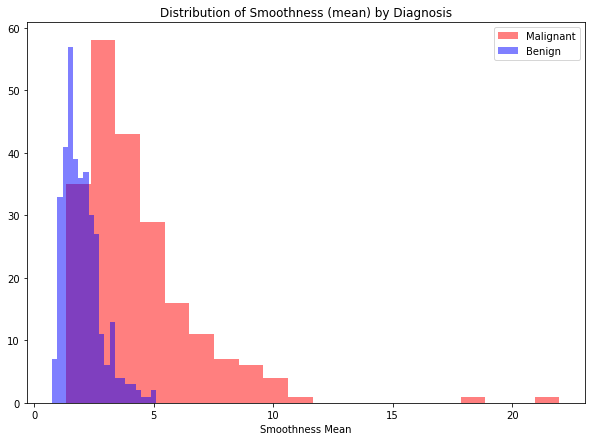

In [33]:
# Print out a histogram of the feature, showing the distribution for each diagnosis
plt.figure(figsize=(10,7))
plt.hist(cancer[cancer['diagnosis']==1]['smoothness_mean'], bins=20, color='r', alpha=0.5, label='Malignant')
plt.hist(cancer[cancer['diagnosis']==0]['smoothness_mean'], bins=20, color='b', alpha=0.5, label='Benign')
plt.xlabel('Smoothness Mean')
plt.legend()
plt.title('Distribution of Smoothness (mean) by Diagnosis');

I'll explore the visualization technique further in the next notebook ([Exploratory Analysis](../code/Exploratory_Analysis.ipynb)), but above is just a simple view of the distributions of smoothness mean between samples.


Based on the above, it does appear that smoothness and compactness differ between malignant and benign samples. However, I'd like to get a more rigorous answer with a specific degree of confidence. Therefore, I will conduct a two sample t-test of the means.

Specifically, I am going to test the null hypothesis that the means (for smoothness_mean and compactness_mean) are equal at the 5% significance level.

In [14]:
t, p = stats.ttest_ind(cancer[cancer['diagnosis'] == 1]['smoothness_mean'],
                       cancer[cancer['diagnosis'] == 0]['smoothness_mean'])

print(f'Smoothness Means\nt-statistic: {t}\np-value: {p}')

Smoothness Means
t-statistic: 15.934158019257902
p-value: 1.6519051758498057e-47


In [15]:
t, p = stats.ttest_ind(cancer[cancer['diagnosis'] == 1]['compactness_mean'],
                       cancer[cancer['diagnosis'] == 0]['compactness_mean'])

print(f'Compactness Means\nt-statistic: {t}\np-value: {p}')

Compactness Means
t-statistic: 7.2970774374485305
p-value: 9.975994654074587e-13


Based on the results of my t-test above, we can reject (with 95% confidence) the null hypothesis that the smoothness and compactness measurements were drawn from samples with equal means. In fact, we could have chosen a much lower significance level and still reject the null. The evidence appears strong that smoothness and compactness will be good predictors of a malignant diagnosis.

In [20]:
# write the prepared dataset to csv, for use in EDA and Modeling notebooks
cancer.to_csv('../data/breast-cancer-cleaned.csv')